<a href="https://colab.research.google.com/github/L98S/Miami-Housing-prices/blob/main/Miami_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Introduction
Hello and welcome to another data science project! In this endeavor, we will dive into the Miami Housing Dataset to predict house prices using its rich set of features. Miami's real estate market offers a captivating landscape for exploration, and through the power of data science, we aim to unlock valuable insights that can help forecast property values accurately.
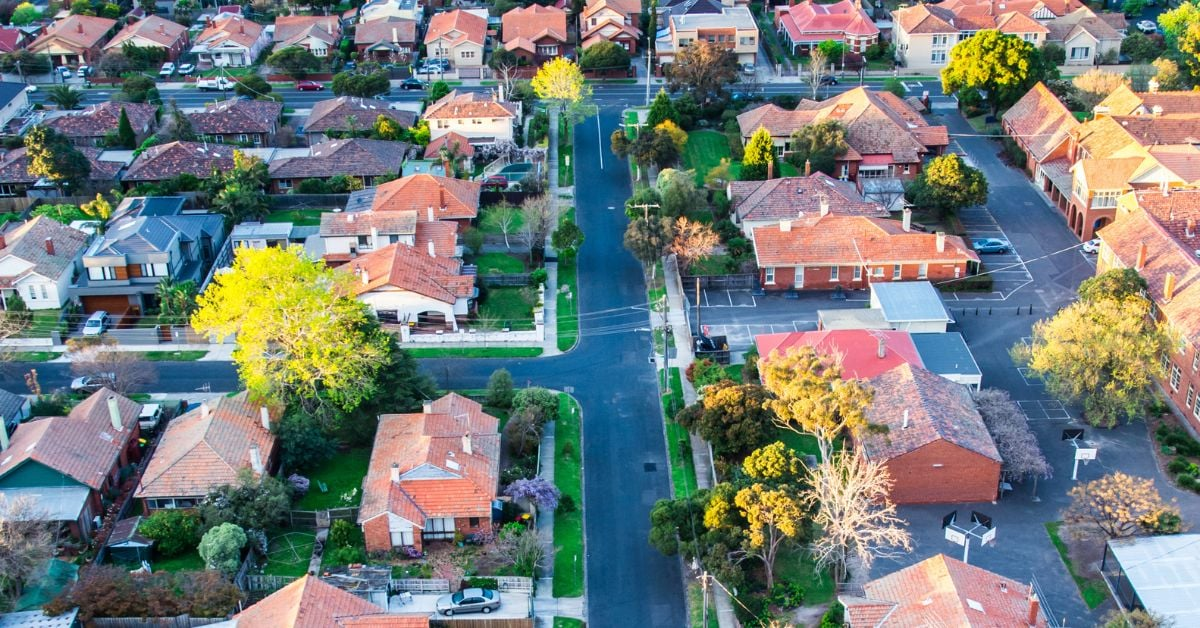
---




## About the Dataset:
 the Miami Housing Dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset), serves as a valuable foundation for our project. It contains the following columns:

-PARCELNO: unique identifier for each property. About 1% appear multiple times.

-SALE_PRC: sale price (dollar)

-LND_SQFOOT: land area (square feet)

-TOT_LVG_AREA: floor area (square feet)

-SPEC_FEAT_VAL: value of special features (e.g., swimming pools) (dollar)

-RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)

-OCEAN_DIST: distance to the ocean (feet)

-WATER_DIST: distance to the nearest body of water (feet)

-CNTR_DIST: distance to the Miami central business district (feet)

-SUBCNTR_DI: distance to the nearest subcenter (feet)

-HWY_DIST: distance to the nearest highway (an indicator of noise) (feet)

-age: age of the structure

-avno60plus: dummy variable for airplane noise exceeding an acceptable level

-structure_quality: quality of the structure

-month_sold: sale month in 2016 (1 = jan)

-LATITUDE

-LONGITUDE

# 2.Load The Data
Lets start by loading the data, I will access the data from kaggle using the following code


In [1]:
import os
from getpass import getpass
os.environ['KAGGLE_USERNAME'] = getpass('Enter your Kaggle username: ')
os.environ['KAGGLE_KEY']= getpass('Enter your Kaggle key: ')

Enter your Kaggle username: ··········
Enter your Kaggle key: ··········


In [2]:
!kaggle datasets download -d deepcontractor/miami-housing-dataset -f miami-housing.csv --quiet

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/content/miami-housing.csv.zip")

In [5]:
df

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


In [6]:
#Let's make all the columns names in the dataset consistent by converting them to lowercase
df.columns = df.columns.str.lower()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           13932 non-null  float64
 1   longitude          13932 non-null  float64
 2   parcelno           13932 non-null  int64  
 3   sale_prc           13932 non-null  float64
 4   lnd_sqfoot         13932 non-null  int64  
 5   tot_lvg_area       13932 non-null  int64  
 6   spec_feat_val      13932 non-null  int64  
 7   rail_dist          13932 non-null  float64
 8   ocean_dist         13932 non-null  float64
 9   water_dist         13932 non-null  float64
 10  cntr_dist          13932 non-null  float64
 11  subcntr_di         13932 non-null  float64
 12  hwy_dist           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

It appears that the dataset does not contain any null values, and all the attributes in the dataset are continuous values.

In [8]:
df.describe()

,latitude,longitude,parcelno,sale_prc,lnd_sqfoot,tot_lvg_area,spec_feat_val,rail_dist,ocean_dist,water_dist,cntr_dist,subcntr_di,hwy_dist,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


When working with numerical attributes, a convenient method to gain insight into the nature of the data is by creating histograms for each attribute. Histograms provide a visual representation of the distribution of values within an attribute, allowing for a quick understanding of the data's characteristics.

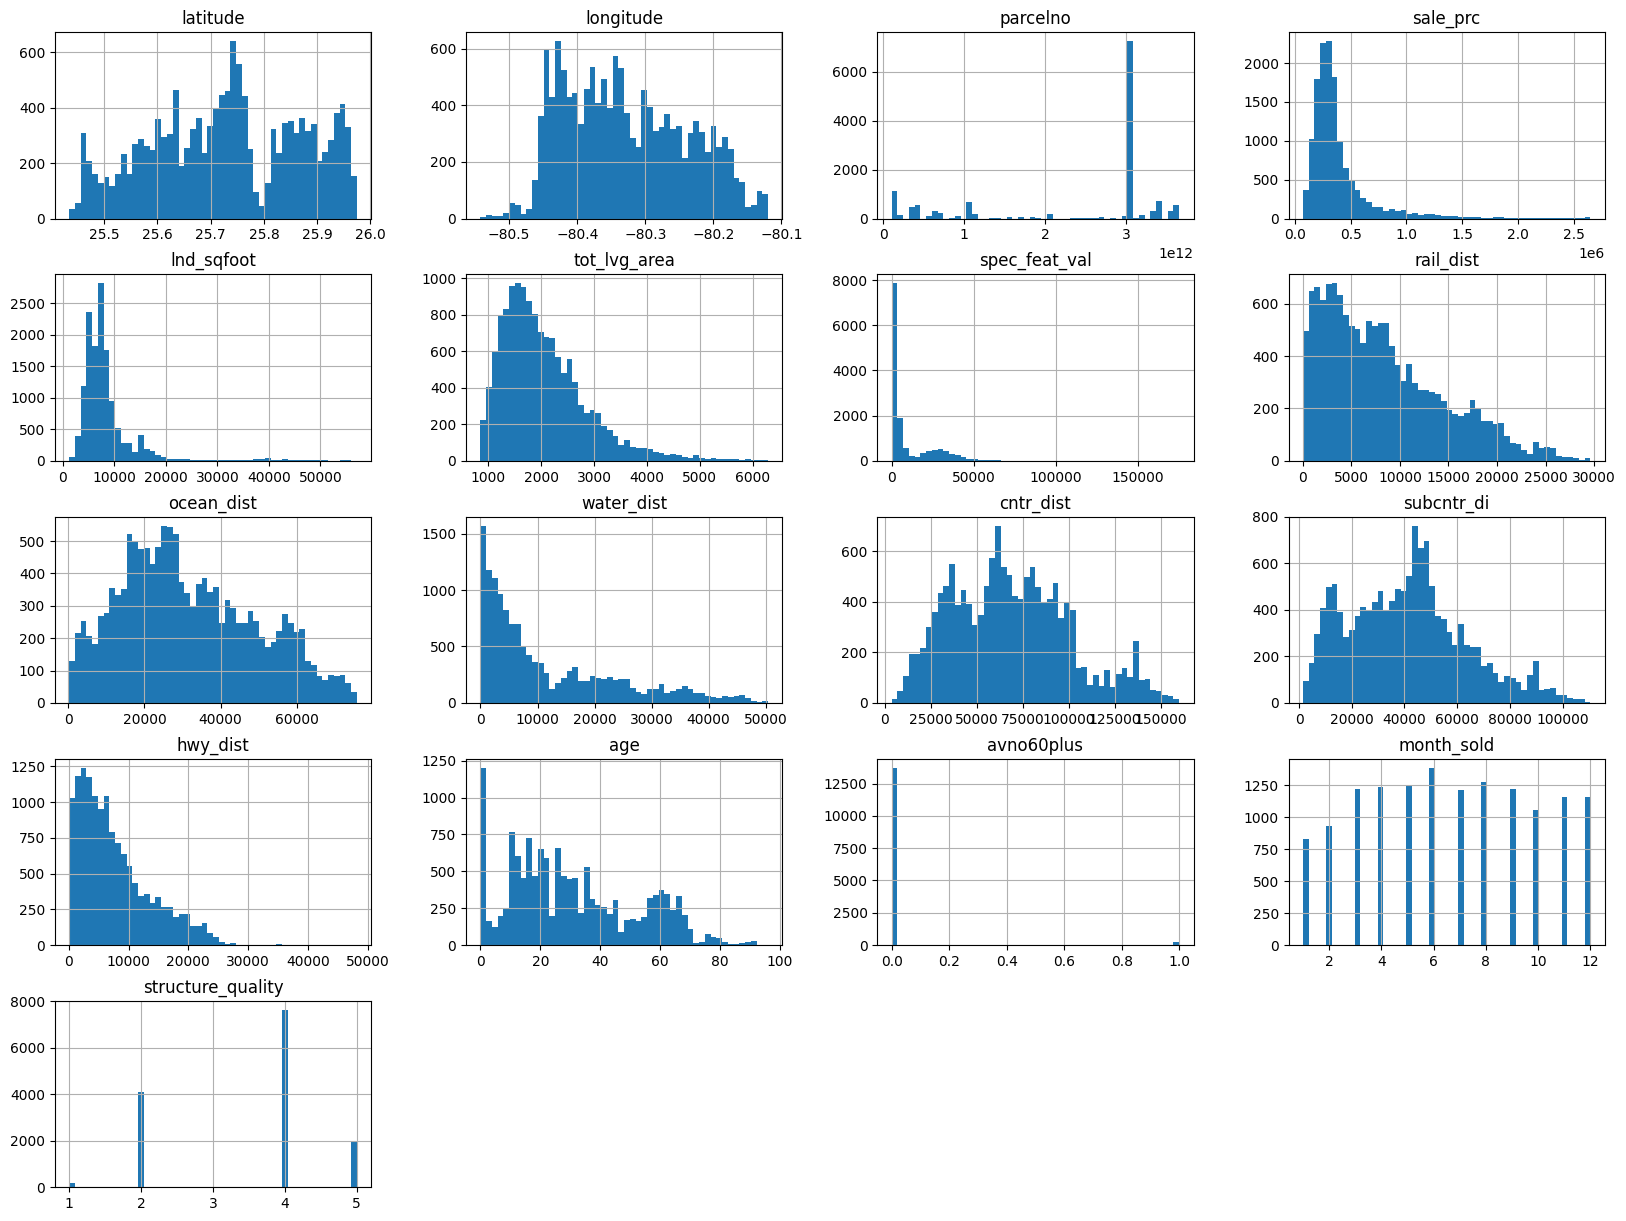

In [9]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Alright, after taking a look at these histograms we notice that the attributes in our dataset have different scales.We'll have to tackle this issue latter on with feature scaling techniques, which will help us bring all the attributes to a consistent scale, ensuring fair comparisons and accurate modeling.

# 3.Splitting the data to train and test set

Given the size of our dataset, it is crucial to avoid introducing sampling bias. To achieve this, we will opt for stratified sampling. Now, we need to carefully choose an attribute that will allow us to perform stratified sampling effectively. In such situations, it is recommended to consider attributes that exhibit a strong correlation with the target variable or attributes that are known to have a substantial influence on the outcome we are trying to predict.

To consider attributes that are highly correlated with the target variable, we can calculate the correlation coefficients between each attribute and the target variable (the correlation coefficient measures the strength and direction of the linear relationship between two variables)

In [10]:
corr_matrix = df.corr()
corr_matrix['sale_prc'].sort_values(ascending = False)

sale_prc             1.000000
tot_lvg_area         0.667301
spec_feat_val        0.497500
structure_quality    0.383995
lnd_sqfoot           0.363077
hwy_dist             0.231877
longitude            0.195274
latitude             0.047701
month_sold           0.000325
avno60plus          -0.027026
rail_dist           -0.077009
age                 -0.123408
water_dist          -0.127938
parcelno            -0.204068
cntr_dist           -0.271425
ocean_dist          -0.274675
subcntr_di          -0.370078
Name: sale_prc, dtype: float64

Based on your observation, if Total living area exhibits the strongest relationship with the target variable, it seems reasonable to choose it as the attribute for stratification, and since it's a continuous attribute we'll need to create a total living area category attribute. so let us take a closer look at it's histogram

<Axes: >

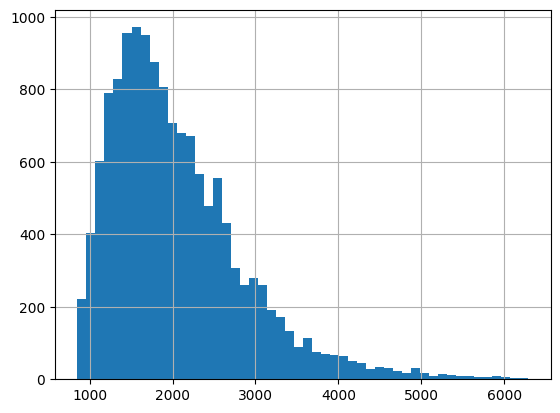

In [11]:
df['tot_lvg_area'].hist(bins=50)


most values are clustered between (1000--3000) but some values go far beyond 3000, so we'll crate 5 catagories labeled from 1 to 5 category 1 ranges from 0 to 1000  category 2 from 1000 to 2000, and so on

In [12]:
df["tot_lvg_area_cat"] = pd.cut(df["tot_lvg_area"],bins=[0, 1000, 2000, 3000, 4000, np.inf], labels=[1, 2, 3, 4, 5])

<Axes: >

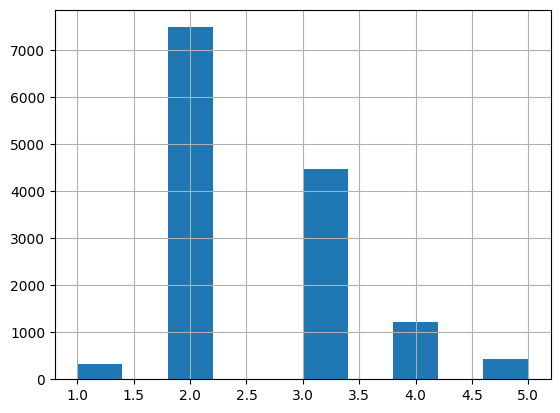

In [13]:
df["tot_lvg_area_cat"].hist()

In [14]:
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(df, test_size =0.2,shuffle=True,stratify=df["tot_lvg_area_cat"], random_state=42)

In [15]:
#looking at the proportion to check out work
df_train["tot_lvg_area_cat"].value_counts() / len(df_train)

2    0.536833
3    0.320951
4    0.087483
5    0.031135
1    0.023598
Name: tot_lvg_area_cat, dtype: float64

In [16]:
df["tot_lvg_area_cat"].value_counts() / len(df)

2    0.536822
3    0.320916
4    0.087496
5    0.031151
1    0.023615
Name: tot_lvg_area_cat, dtype: float64

In [17]:
#Now we should remove the income_cat attribute so the data is back to its original state:
for set_ in (df_train,df_test):
     set_.drop("tot_lvg_area_cat", axis=1, inplace=True)

Okay now With the test set in place, we can now proceed to the next stage! exploring the data and gaining insights from it. This exploration phase will provide us with a deeper understanding of the dataset and set the foundation for subsequent analyses and model development.

# 4.Exploratory data analysis

## 4.1 Data Visualization
Let's take a closer look at the distributions

In [18]:
import plotly.express as px
for att in ['age', 'avno60plus', 'month_sold','structure_quality']:
    fig = px.histogram(df_train, x=att, title=att,color=att)
    fig.update_layout(xaxis_title=None, yaxis_title='Count',showlegend=False)
    fig.show()

In [19]:
for att in ['sale_prc','lnd_sqfoot', 'tot_lvg_area',
       'spec_feat_val', 'rail_dist', 'ocean_dist', 'water_dist', 'cntr_dist',
       'subcntr_di', 'hwy_dist']:
    fig = px.histogram(df_train, x=att)
    fig.update_layout(title=att, title_font_size=20)
    fig.update_layout(height=400, showlegend=False, xaxis_title='')
    fig.show()
    fig = px.box(df_train, x=att, orientation='h')
    fig.update_layout(height=400, showlegend=False, xaxis_title='')
    fig.show()

## 4.2 Visualizing Geographical Data
Now let's visualize the geographical data. It's always helpful to see the distribution of data on a map, especially when we have latitude and longitude information

In [20]:
import plotly.express as px

fig = px.scatter(
    df_train,
    x='longitude',
    y='latitude',
    color='sale_prc',
    color_continuous_scale='Jet',
    opacity=0.4,
    size_max=12,
    labels={'sale_prc': 'Sale Price'},
    title='Geographical Scatter Plot of Miami',
    width=800,
    height=600
)

fig.update_layout(coloraxis_colorbar=dict(title='Sale Price'))

fig.show()


From this scatter plot we can see how the houses are distributed and what areas have a higher density of houses, we also can observe that houses closer to the ocean tend to have higher prices in Miami.

## 4.3 Looking for Correlations
Now let’s look at how much each attribute correlates with the sale price

In [21]:
#looking at the correlation matrix
corr_matrix_tr = df_train.corr()
corr_matrix_tr['sale_prc'].sort_values(ascending = False)

sale_prc             1.000000
tot_lvg_area         0.665880
spec_feat_val        0.493411
structure_quality    0.385458
lnd_sqfoot           0.365030
hwy_dist             0.235575
longitude            0.193855
latitude             0.041336
month_sold           0.004021
avno60plus          -0.026918
rail_dist           -0.071483
age                 -0.119340
water_dist          -0.128599
parcelno            -0.211656
cntr_dist           -0.271895
ocean_dist          -0.279370
subcntr_di          -0.375175
Name: sale_prc, dtype: float64

as we saw erler "tot_lvg_area" has the highest positive correlation (0.667301) with the sale price. This suggests that as the floor area increases, the sale price tends to increase as well."subcntr_di" has the highest negative correlation (-0.370078) with the sale price. This suggests that houses located closer to subcenters tend to have higher sale prices.

Another way to explore the correlation between attributes is by using Pandas' scatter_matrix. It creates scatter plots for each numerical attribute against every other numerical attribute. With 17 numerical attributes in our dataset, that would result in a total of 289 plots, which is quite a lot to fit on a single page. To make things more manageable, let's narrow down our focus to a select few attributes that show the most promising correlation with the sale price.

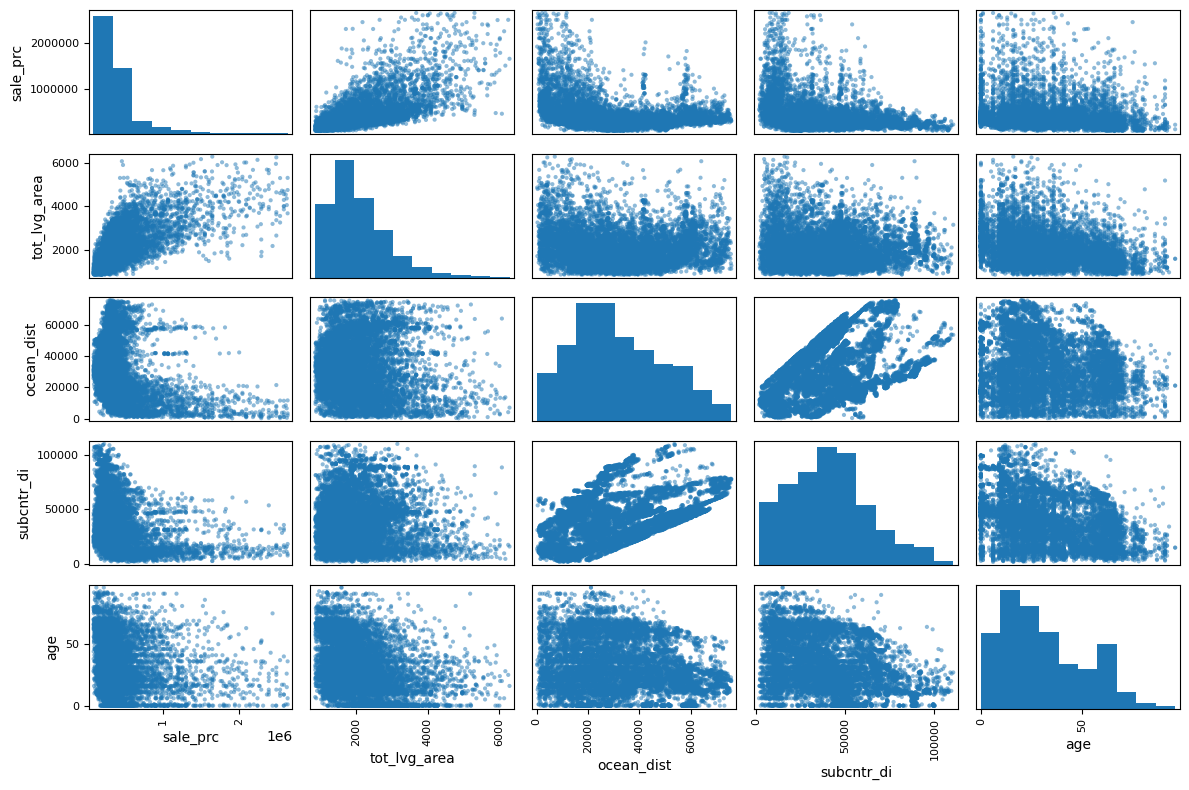

In [22]:
from pandas.plotting import scatter_matrix
attributes = ['sale_prc', 'tot_lvg_area', 'ocean_dist','subcntr_di', 'age']
scatter_matrix(df_train[attributes], figsize=(12, 8))
plt.tight_layout()
plt.show()

# 5.Data Preprocessing
After exploring the data and gaining valuable insights, we have acquired a good understanding of its characteristics. With this knowledge in hand, we can now proceed to the next step, preparing the data for training.

In [23]:
#first separate the X_train , y_train
X_train = df_train.drop("sale_prc", axis=1)
y_train = df_train['sale_prc']

## 5.1 Feature selection (highly correlated features)
first we will see if there are any highly correlated features that we can eliminate since it's an important step in feature selection and dimensionality reduction. Highly correlated features can introduce redundancy and multicollinearity into the dataset, which can negatively impact model performance and interpretability.

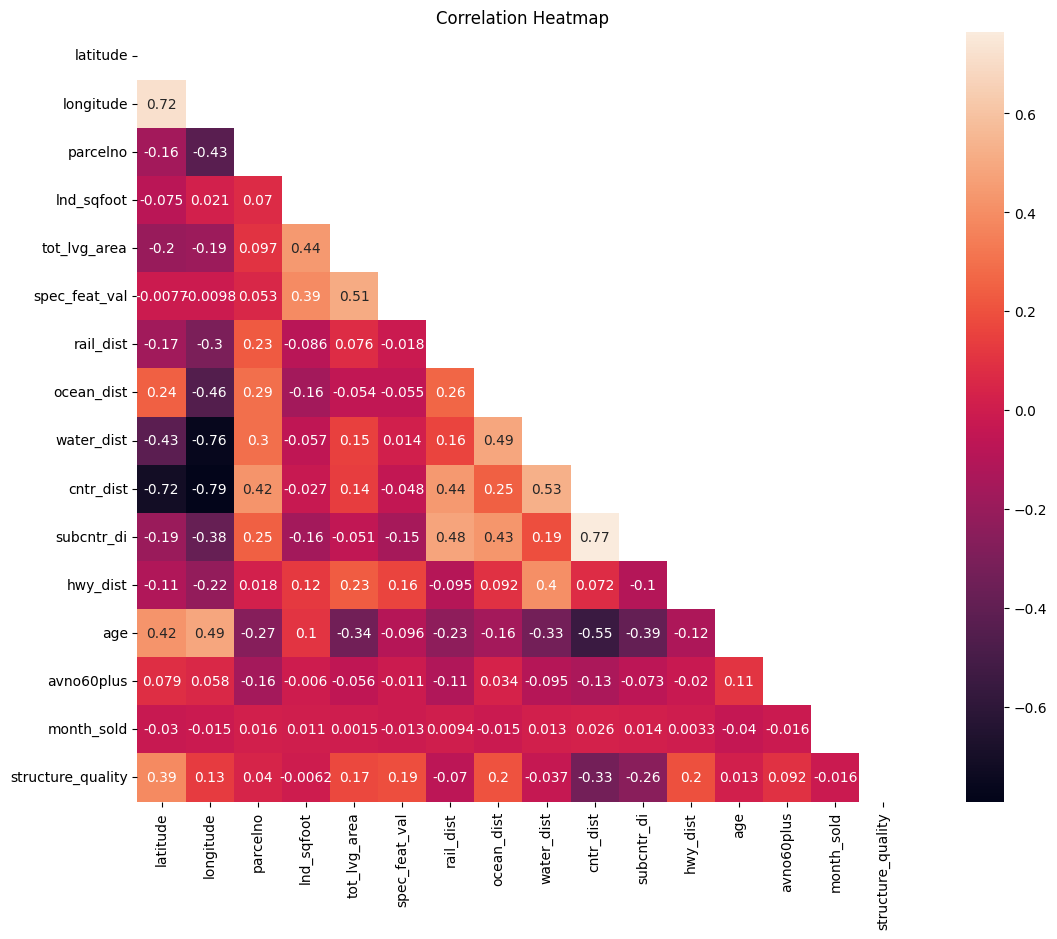

In [24]:
#creating a heatmap so we can visualize the correlations
import numpy as np
import seaborn as sns

# Create a correlation matrix
corr_matrix_all = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_all, dtype=bool))

# Set up the figure and axis
plt.figure(figsize=(15, 10))
ax = sns.heatmap(data=corr_matrix_all, annot=True, cmap='rocket', mask=mask)

# Customize the plot
ax.set_title('Correlation Heatmap')
ax.set_xticklabels(corr_matrix_all.columns, rotation=90)
ax.set_yticklabels(corr_matrix_all.columns)
ax.set_aspect('equal')

# Show the plot
plt.show()


After examining the Heatmap, it appears that there are no highly correlated features. However, to ensure our findings are accurate, we can perform additional checks using the following functions:

In [25]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(X_train, 0.95)
print(len(set(corr_features)))

0


Based on our analysis, we have determined that there are no highly correlated features that need to be removed for our regression task.

## 5.2 Features Scaling
It is crucial to address the issue of varying scales among different attributes in our dataset. This discrepancy in scales can pose challenges during the modeling process, as it may lead to certain attributes dominating others simply due to their larger values. To mitigate this problem, we employ feature scaling techniques. One such technique is standard scaling, which involves transforming the attributes to have zero mean and unit variance.

In [27]:
num_att = ['latitude', 'longitude', 'lnd_sqfoot', 'tot_lvg_area', 'spec_feat_val', 'rail_dist', 'ocean_dist',
           'water_dist', 'cntr_dist', 'subcntr_di', 'hwy_dist']
other_att = ['parcelno', 'age', 'avno60plus', 'month_sold', 'structure_quality']

In [28]:
#let's build a pipeline!
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Create the transformers
num_transformer = StandardScaler()
other_transformer = 'passthrough'  # No transformation for other attributes

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_att),
        ('other', other_transformer, other_att)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Apply the pipeline to X_train
X_train_transformed = pipeline.fit_transform(X_train)

# 6.Trying out different models
Now, let's proceed to explore different algorithms and evaluate their performance. It is a good practice to use multiple evaluation metrics to get a comprehensive understanding of the model's performance. In this case, we will use three commonly used metrics: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R^2).  


In [29]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.1 MB/s eta 0:00:00


In [30]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Define a dictionary of algorithms
algorithms = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=False),
    'Bagging Ensemble': BaggingRegressor()
}

# Create an empty DataFrame to store the evaluation results
evaluation_df = pd.DataFrame(columns=['Algorithm', 'RMSE', 'RMSE CV', 'MAE', 'MAE CV', 'R-squared', 'R-squared CV'])

# Evaluate each algorithm
for algo_name, algo in algorithms.items():
    # Fit the model
    algo.fit(X_train_transformed, y_train)

    # Make predictions
    y_pred = algo.predict(X_train_transformed)

    # Calculate evaluation metrics on the training set
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    # Perform cross-validation
    cv_scores_rmse = np.sqrt(-cross_val_score(algo, X_train_transformed, y_train, scoring='neg_mean_squared_error', cv=5))
    cv_scores_mae = -cross_val_score(algo, X_train_transformed, y_train, scoring='neg_mean_absolute_error', cv=5)
    cv_scores_r2 = cross_val_score(algo, X_train_transformed, y_train, scoring='r2', cv=5)

    # Calculate mean cross-validation scores
    mean_cv_rmse = cv_scores_rmse.mean()
    mean_cv_mae = cv_scores_mae.mean()
    mean_cv_r2 = cv_scores_r2.mean()

    # Append the evaluation metrics to the DataFrame
    evaluation_df = evaluation_df.append({
        'Algorithm': algo_name,
        'RMSE': rmse,
        'RMSE CV': mean_cv_rmse,
        'MAE': mae,
        'MAE CV': mean_cv_mae,
        'R-squared': r2,
        'R-squared CV': mean_cv_r2
    }, ignore_index=True)



<ipython-input-30-b73ff42cd5bc>:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-30-b73ff42cd5bc>:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-30-b73ff42cd5bc>:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-30-b73ff42cd5bc>:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-30-b73ff42cd5bc>:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-30-b73ff42cd5bc>:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [31]:
evaluation_df

,Algorithm,RMSE,RMSE CV,MAE,MAE CV,R-squared,R-squared CV
0,Linear Regression,169979.264438,170302.987724,110088.970893,110281.841605,0.715738,0.713776
1,Random Forest,34928.617735,96761.462262,16775.954096,46733.265103,0.987997,0.907154
2,Decision Tree,427.499817,144278.324560,13.734111,67740.466308,0.999998,0.799056
3,XGBoost,27908.531884,93613.469199,20051.357142,46056.142828,0.992337,0.913334
4,CatBoost,39575.653449,80680.494443,26832.459796,40688.237798,0.984591,0.935617
5,Bagging Ensemble,43136.859055,102589.240225,19776.730621,49954.654299,0.981693,0.892572


Based on the provided results, the two best models are:

-CatBoost demonstrates good performance with the lowest RMSE and RMSE CV scores. However, there is a notable difference between the training and cross-validation scores, indicating some degree of overfitting. The MAE and R-squared values also show favorable results.

-XGBoost performs well with relatively low RMSE, but it also exhibits overfitting as seen from the difference between RMSE and RMSE CV scores. The MAE and R-squared values indicate reasonably accurate predictions.


# 7.Hyperparameter Tuning:
One way to address overfitting and improve the performance of XGBoost and CatBoost is to use regularization techniques. In CatBoost, enable the overfitting detector by specifying the od_type parameter and including it in GridSearchCV we can find the best hyperparameter combination to optimize performance and prevent overfitting.

For XGBoost, adjust parameters like max_depth, learning_rate, and reg_lambda can control model complexity and prevent overfitting. By searching through different combinations of these parameters using GridSearchCV, we can find the optimal set of hyperparameters that strike a balance between model complexity and generalization. This ensures minimal overfitting and maximizes the model's predictive power.

In [32]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'reg_lambda': [0.1, 1, 10]
}

# Define the parameter grid for CatBoost
param_grid_catboost = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'od_type': ['IncToDec', 'Iter']
}
# Initialize the models
xgb = XGBRegressor()
catboost = CatBoostRegressor(verbose=False)

# Perform grid search with cross-validation for XGBoost
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_xgb.fit(X_train_transformed, y_train)

# Perform grid search with cross-validation for CatBoost
grid_search_catboost = GridSearchCV(catboost, param_grid_catboost, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_catboost.fit(X_train_transformed, y_train)

# Get the best parameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_

# Get the best parameters for CatBoost
best_params_catboost = grid_search_catboost.best_params_


In [33]:
print(best_params_xgb)
print(best_params_catboost)

{'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 1}
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'od_type': 'IncToDec'}


# 8.Evaluate on the Test Set
After training and fine-tuning the XGBoost and CatBoost models, it is time to assess their performance using the dedicated test set!

In [34]:
# Split the data into training and testing sets
y_test = df_test['sale_prc']
X_test = df_test.drop("sale_prc", axis=1)
# Apply the pipeline to the training and testing sets
X_test_transformed = pipeline.transform(X_test)

In [36]:
import plotly.graph_objects as go
from sklearn.metrics import r2_score, mean_squared_error

# Define the models and their best parameters
models = {
    'XGBoost': (XGBRegressor(**best_params_xgb), 'blue'),
    'CatBoost': (CatBoostRegressor(**best_params_catboost, verbose=False), 'red')
}

# Initialize empty lists to store scores
r2_scores = []
rmse_scores = []

# Fit models, calculate scores, and store in the lists
for model_name, (model, color) in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    print(f"Model: {model_name}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print("----------------------")


# Create a line plot for R2 scores
fig_r2 = go.Figure(data=go.Scatter(x=list(models.keys()), y=r2_scores, mode='lines+markers', marker=dict(color='blue')))
fig_r2.update_layout(
    title='R2 Score Comparison',
    xaxis=dict(title='Algorithm'),
    yaxis=dict(title='R2 Score'),
)

# Create a line plot for RMSE scores
fig_rmse = go.Figure(data=go.Scatter(x=list(models.keys()), y=rmse_scores, mode='lines+markers', marker=dict(color='red')))
fig_rmse.update_layout(
    title='RMSE Comparison',
    xaxis=dict(title='Algorithm'),
    yaxis=dict(title='RMSE'),
)

# Display the line plots
fig_r2.show()
fig_rmse.show()


Model: XGBoost
R2 Score: 0.913180049045382
RMSE: 91542.99548002683
----------------------
Model: CatBoost
R2 Score: 0.9226764148335581
RMSE: 86391.56519405276
----------------------


# 9.Conclusion
The CatBoost model outperformed other models in predicting house prices, yielding the lowest RMSE and highest R-squared score.

And that's a wrap! Thank you for checking out this project and see you in the next one:)